<a href="https://colab.research.google.com/github/al34n1x/senpai/blob/main/eval_data_analysis/examen_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

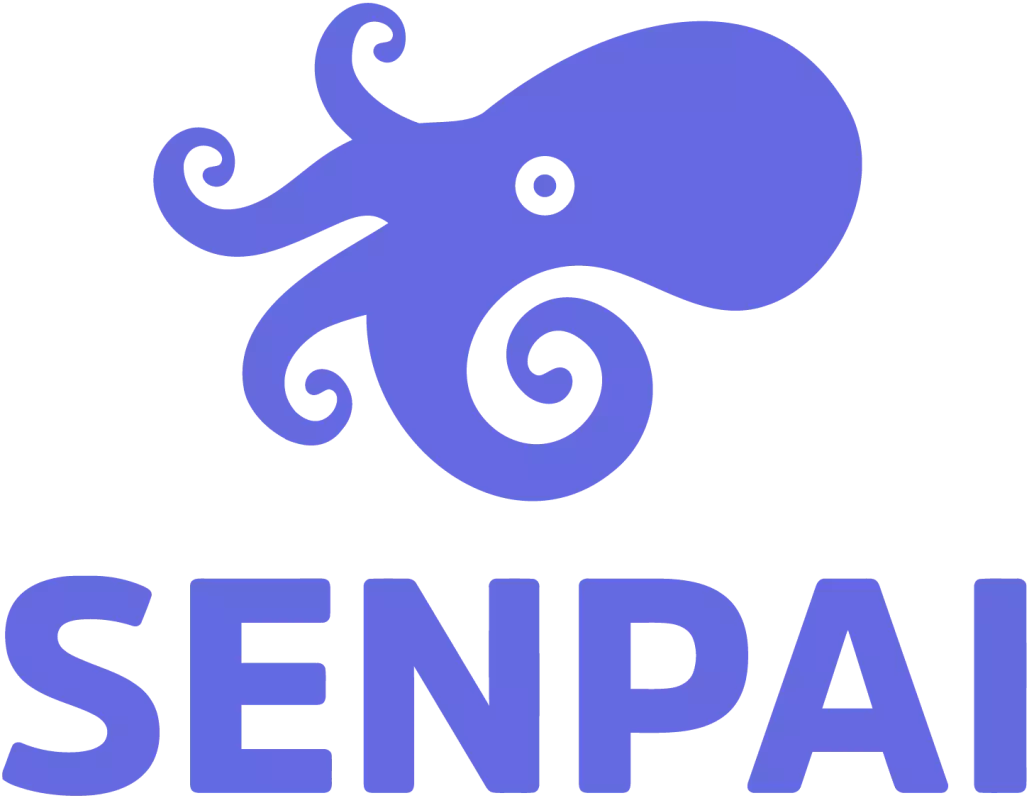


# Examen Analisis de datos - Senpai Academy

A continuación, se detallan las indicaciones para la resolución del examen. Tenga a bien leer todas las instrucciones y no dude en consultar si tiene alguna consulta.

1. El examen se realiza de forma grupal comenzando el 1 de Agosto a las 7:00 PM. La defensa del mismo se realizará el día 10 de Agosto a las 7:00 PM. Como parte de la evaluación se ponderan tres pilares, el desarrollo de la solución (Notebook), la defensa grupal y la presentación individual
2. La fecha de entrega de trabajo es el 9 de Agosto a las 9:00 AM
3. Tanto el código como el análisis y las visualizaciones se deben entregan en un notebook en formato **.ipynb**, y en caso de utilizar soluciones **BI** en el formato correspondiente *(Ejemplo: Tableu: .twb)*
4. Puede utilizar diferentes herramientas para el desarrollo como Jupyter, Colab, Spypder o VSCodium, sin embargo, el trabajo final debe ser entregado en un notebook como estipulado en el punto 3.
5. Se deberan insertar al menos 5 filas con valores de películas randoms, preferentemente títulos nacionales que no se encuentren listados en el dataset. Los mismos pueden ser datos sintéticos.
6. Los trabajos deberán ser enviados por correo al cuerpo docente (1 por grupo).
7. Para visualizaciones se deben usar las librerías **matplotlib**, **seaborn**, o **Plotly**. Como requisito mínimo se requieren 3 visualizaciones como parte de preparación y transformación de datos.
8. Las visualizaciones finales, en conjunto con la conclusión pueden ser desarrolladas mediante soluciones de **BI** *(Ejemplo: Tableu, PowerBI, etc)*
9. Los archivos a utilizar se encuentran almacenados en la siguiente URL:

**Dataset:** 

https://drive.google.com/file/d/1f3rcarrVUjkZLWcNwY8t2CwRrvZlO3NE/view?usp=sharing

---




## Datos del Grupo (Ingrese los datos de los miembros del grupo)

Nombre | Apellido
-------|----------
Gerardo  | Castro
Virginia | Paternostro

---




## Herramientas utilizadas

A continuación detallen las herramientas utilizadas para el desarrollo del examen.

- Pandas
- Seaborn
- pycountry



In [1]:
import pandas as pd
import seaborn as sns

In [2]:
!pip install pycountry

## CONSIGNA ##


En el próximo trabajo ahondaremos en confirmar o refutar dos grandes hipótesis, generando para ello una cierta cantidad de consultas.

**HIPÓTESIS 1**

A partir del 2010, se ve un claro despegue en la cantidad de producciones, tanto a nivel de películas como de series, entendemos que se debe a la aparición de las plataformas de streaming. 

**HIPÓTESIS 2**

Con el paso de los años y la incorporación de plataformas de streaming tal como Netflix, han llevado a que las películas duren en promedio menos a lo largo del tiempo.

**HIPÓTESIS 3**

En los últimos 10 años la proporción de series sobre películas a crecido, es decir, hoy en día se producen más series que hace 10 años.


## Carga de datos

In [3]:
df_inicial = pd.read_csv('titles.csv')
df_inicial.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


## Carga de 5 títulos nacionales ##

In [4]:
# Hamos creado un csv con la misma estructura que el dataset de consigna, y lo editamos
# para introducir los datos artificialmente. 
df_nacionales = pd.read_csv('5 titulos nacionales.csv')
df_nacionales.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts1000399,El año del Dragón,SHOW,NaN,2000,TV-MA,51,['drama'],['UY'],1.0,NaN,6.7,35678,0.600,NaN
1,tm204618,25 Watts,MOVIE,NaN,2005,R,114,['drama'],['UY'],NaN,NaN,8.2,808582,40.965,8.179
2,tm1354986,La Despedida,MOVIE,NaN,1999,R,90,['drama'],['UY'],NaN,NaN,7.7,107673,10.010,7.300
3,tm1347384,El baño del papa,MOVIE,NaN,2003,PG,98,['drama'],['UY'],NaN,NaN,8.2,534486,15.461,7.811
4,tm12456801,Whisky,MOVIE,NaN,2001,PG,92,['drama'],['UY'],NaN,NaN,7.7,72662,20.398,7.600


In [5]:
df = df_inicial.append(df_nacionales, ignore_index=True)

# Agregamos las filas creadas "artificialmente" al final del df_inicial, creando un nuevo df
# ignore_index True indica que se indexarán los filas agregadas con numeración correlativa
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.append.html

df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,ts1000399,El año del Dragón,SHOW,NaN,2000,TV-MA,51,['drama'],['UY'],1.0,NaN,6.7,35678.0,0.600,NaN
5851,tm204618,25 Watts,MOVIE,NaN,2005,R,114,['drama'],['UY'],NaN,NaN,8.2,808582.0,40.965,8.179
5852,tm1354986,La Despedida,MOVIE,NaN,1999,R,90,['drama'],['UY'],NaN,NaN,7.7,107673.0,10.010,7.300
5853,tm1347384,El baño del papa,MOVIE,NaN,2003,PG,98,['drama'],['UY'],NaN,NaN,8.2,534486.0,15.461,7.811


## Descripción del dataset actual ##

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5855 entries, 0 to 5854
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5855 non-null   object 
 1   title                 5854 non-null   object 
 2   type                  5855 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5855 non-null   int64  
 5   age_certification     3236 non-null   object 
 6   runtime               5855 non-null   int64  
 7   genres                5855 non-null   object 
 8   production_countries  5855 non-null   object 
 9   seasons               2107 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5373 non-null   float64
 12  imdb_votes            5357 non-null   float64
 13  tmdb_popularity       5764 non-null   float64
 14  tmdb_score            5543 non-null   float64
dtypes: float64(5), int64(

In [7]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5855.000000,5855.000000,2107.000000,5373.000000,5.357000e+03,5764.000000,5543.000000
mean,2016.404441,76.899231,2.162316,6.511967,2.370854e+04,22.633457,6.829819
std,6.948543,38.992186,2.688522,1.163970,9.663633e+04,81.645925,1.170247
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.170000e+02,2.729250,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.242000e+03,6.823000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.577000e+03,16.597500,7.557000
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [8]:
# Borraror, solo pruebas
df[df.tmdb_score == 10]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
594,ts188031,Pink Zone,SHOW,"Is the story of four friends: Natalia, Angélic...",2007,NaN,0,"['drama', 'romance', 'comedy']",['MX'],1.0,tt11194518,5.8,52.0,0.682,10.0
726,ts191698,Little Baby Bum,SHOW,Little Baby Bum is a fun and educational show ...,2011,TV-Y,7,"['family', 'music', 'animation']",['GB'],4.0,tt10051854,6.4,94.0,0.971,10.0
994,ts122290,Dharmakshetra,SHOW,"After the end of 18 days war of Mahabharata, P...",2014,TV-14,44,['drama'],['IN'],1.0,tt6803712,8.3,273.0,1.243,10.0
1033,ts121189,"Raja, Rasoi Aur Anya Kahaniyaan",SHOW,Explore the history and flavors of regional In...,2014,NaN,29,"['history', 'documentation']",['IN'],3.0,tt6953924,8.9,333.0,0.992,10.0
1303,ts55365,The Haunted House,SHOW,With help from a 102-year-old goblin dwelling ...,2016,TV-PG,25,"['thriller', 'horror', 'animation', 'comedy', ...",['KR'],7.0,tt9518312,8.3,83.0,40.650,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,tm1040959,The Circle: The Afterparty,MOVIE,Stars of The Circle drop by to discuss Season ...,2021,NaN,35,[],['US'],NaN,NaN,NaN,NaN,1.882,10.0
5801,ts270616,We Are: The Brooklyn Saints,SHOW,A Brooklyn youth football program and its self...,2021,TV-14,47,"['documentation', 'sport']",['US'],1.0,tt13656220,6.5,162.0,2.523,10.0
5812,tm1026043,Just in Time,MOVIE,A meticulous clerk for a bookstore that has ju...,2021,NaN,91,"['comedy', 'drama', 'family']",['KE'],NaN,tt14243986,6.9,46.0,1.219,10.0
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.0


In [9]:
# aca va el cuentito bla bla bla !!!!!!!!!!!

### Algunas visualizaciones preliminares que nos permitan descubrir relaciones interesantes a investigar

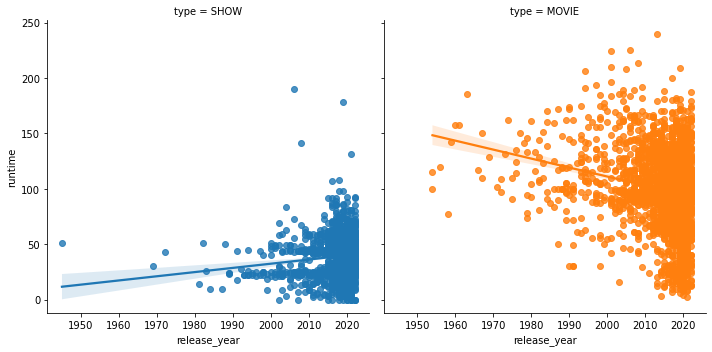

In [10]:
sns.lmplot(data=df, x="release_year", y="runtime", col="type", hue="type")
# Graficos de dispersión desagragados por tipo de producción (serie, pelicula), mostrando la 
# evolución de la duración de las producciones con el tiempo y una línea de tendencia

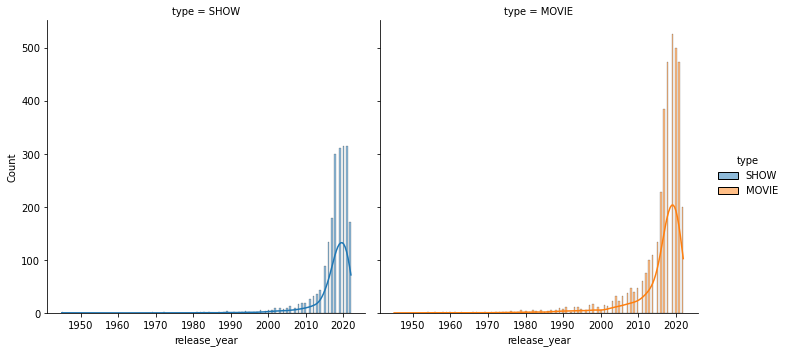

In [11]:
sns.displot(data=df, x="release_year", col="type", kde=True, hue = 'type')
# Gráfico de barras desagregado por tipo, indicando la cantidad de producciones
# por año, y una línea de tendencia suavizada por el estimador kde (kernel density estimation)

# Muestra un aumento sostenido en el tiempo hasta 2010-2012 y un punto de crecimiento 
# exponencial  a partir de allí. 
# También muestra un descenso muy marcado a partir de 2020, coincidente con la pandemia 
# de COVID-19

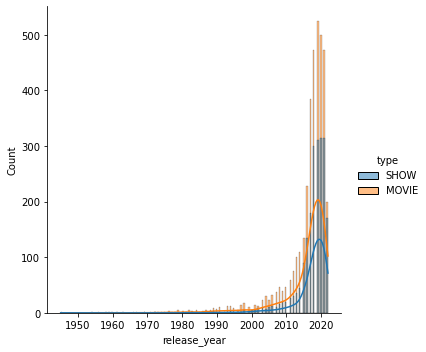

In [12]:
sns.displot(data=df, x="release_year", kde=True, hue = 'type')
# Igual que la anterior pero con los gráficos superpuestos. 
# Las graficas parecen tener un andamiento similar, tal vez con un "despegue" de la produccion
# de peliculas algo previo al de las series

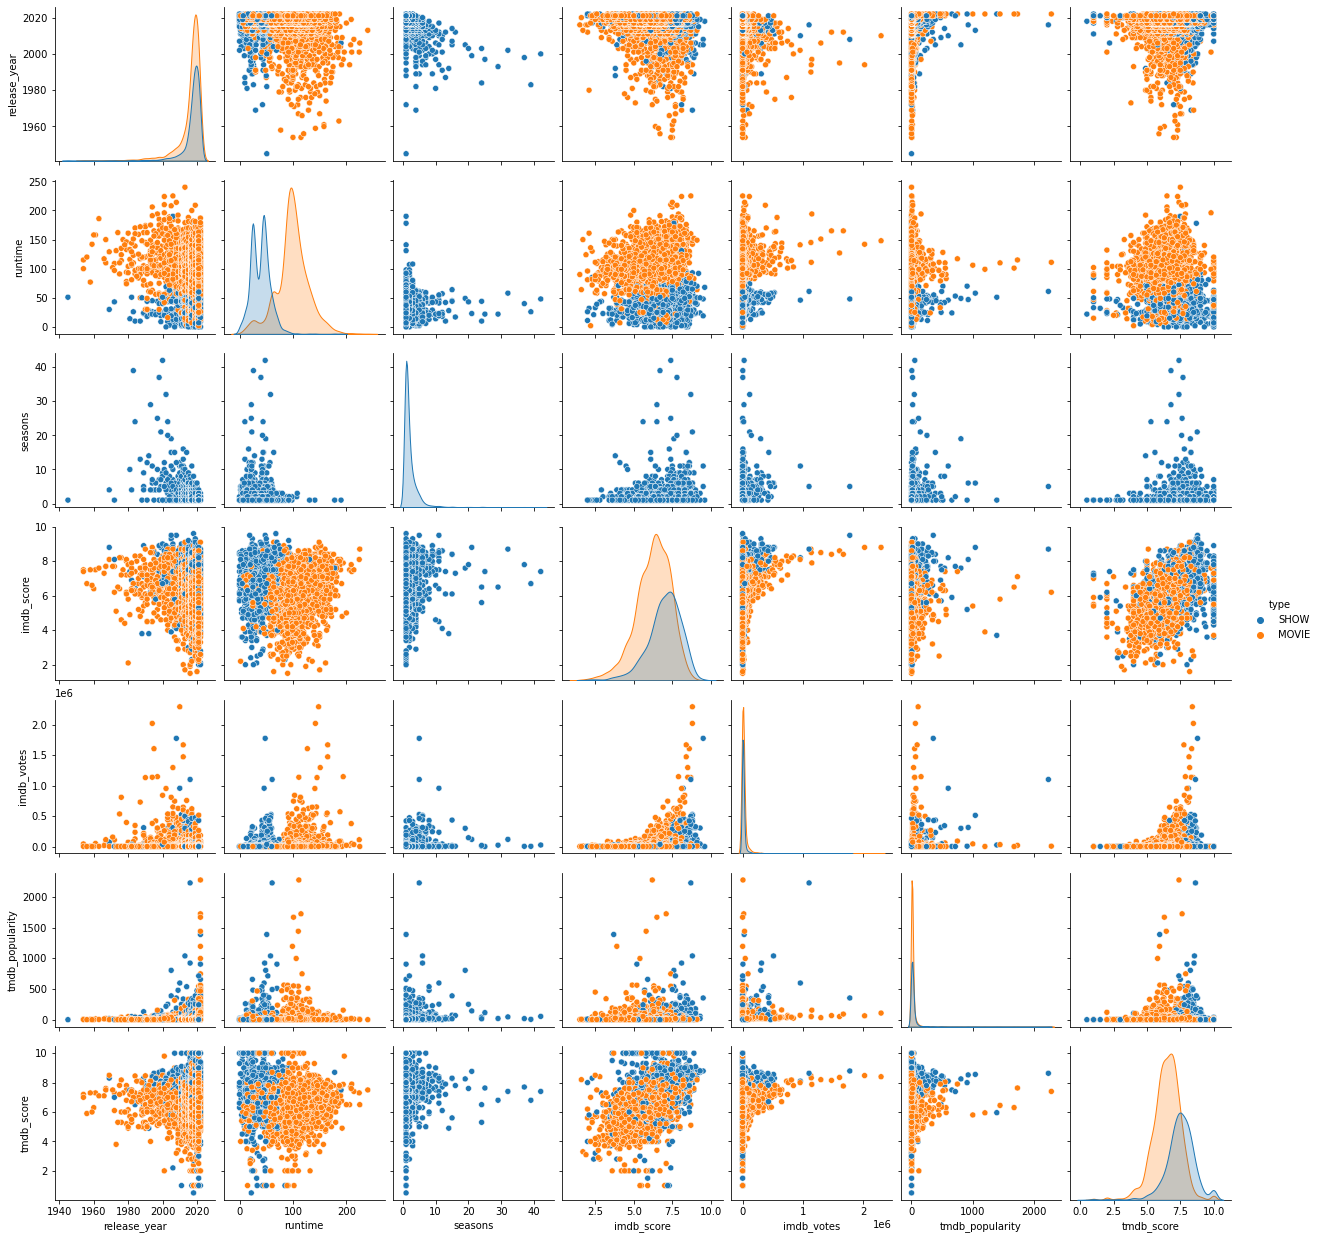

In [13]:
sns.pairplot(data=df,hue="type")
# el método pairplot de seaborn hace un cruzamiento dos a dos de todas las variables numericas 
# del dataframe, permitiéndonos visualizar posibles correlaciones o aspectos interesantes. 
# En este caso, el parámetro hue permite desagregar por tipo, cambiando el color para series y
# peliculas

### Algunas observaciones...
- la duración de as series es en lineas generales inferior a la de las peliculas (lo que resulta razonable si fuera que el runtime del dataset corresponde a duración promedio de cada capítulo)
- Parece haber una cierta correlacion entre los scores de tmdb e imdb...

<AxesSubplot:>

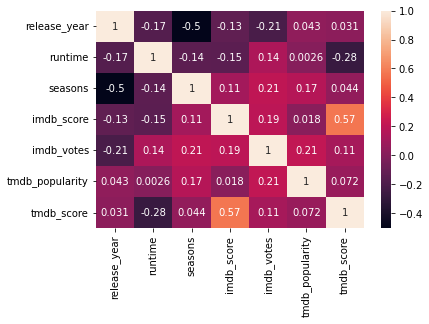

In [14]:
# Hacemos una matriz de correlación y un mapa de calor para identificar los coeficientes de 
# correlación de las variables numericas 2 a 2...

df_subset = df #[df.release_year < 2018]#[df.type == "MOVIE"]
corr_df = df_subset.corr(method='pearson')
sns.heatmap(corr_df, annot=True)

## Limpieza de datos

In [15]:
# Queremos saber si hay duplicados:
df_no_duplicates = df.drop_duplicates()

In [16]:
print(df.size, df_no_duplicates.size)

87825 87825


Dado la respuesta del método *size*, podemos decir que no encontramos datos duplicados.

In [17]:
# Vamos a sustituir los NaN de la columna Seasons por el valor 0, para mantener el tipo de dato numérico.

values = {"seasons": 0}
df = df.fillna(value=values)
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",0.0,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,ts1000399,El año del Dragón,SHOW,NaN,2000,TV-MA,51,['drama'],['UY'],1.0,NaN,6.7,35678.0,0.600,NaN
5851,tm204618,25 Watts,MOVIE,NaN,2005,R,114,['drama'],['UY'],0.0,NaN,8.2,808582.0,40.965,8.179
5852,tm1354986,La Despedida,MOVIE,NaN,1999,R,90,['drama'],['UY'],0.0,NaN,7.7,107673.0,10.010,7.300
5853,tm1347384,El baño del papa,MOVIE,NaN,2003,PG,98,['drama'],['UY'],0.0,NaN,8.2,534486.0,15.461,7.811


In [18]:
# A conitnuación eliminaremos las columnas que no son pertinentes para nuestro análisis.

df = df.drop(['id', 'description', 'age_certification', 'imdb_id' ], axis=1)
df

,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,SHOW,1945,51,['documentation'],['US'],1.0,NaN,NaN,0.600,NaN
1,Taxi Driver,MOVIE,1976,114,"['drama', 'crime']",['US'],0.0,8.2,808582.0,40.965,8.179
2,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.2,534486.0,15.461,7.811
4,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']","['GB', 'US']",0.0,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...
5850,El año del Dragón,SHOW,2000,51,['drama'],['UY'],1.0,6.7,35678.0,0.600,NaN
5851,25 Watts,MOVIE,2005,114,['drama'],['UY'],0.0,8.2,808582.0,40.965,8.179
5852,La Despedida,MOVIE,1999,90,['drama'],['UY'],0.0,7.7,107673.0,10.010,7.300
5853,El baño del papa,MOVIE,2003,98,['drama'],['UY'],0.0,8.2,534486.0,15.461,7.811


## Transformación de datos

In [19]:
df2 = df
print(type(df2['genres'][0]))
print(type(df2['production_countries'][0]))

# Los países y los géneros están guardados en el dataframe como un string, que a su
# vez contiene una lista de diferentes países / géneros. 

# Definimos algunas funciones para extraer la infomración de país y genero de forma más amigable
def country_convert (country_code:str) -> str: 
    import pycountry
    '''Converts a string containing a list of country codes in alpha_2 format to complete 
    country name of the first country in the list (Country names as per ISO 3166-2)
    '''
    result = []
    for items in eval(country_code):
        country = pycountry.countries.get (alpha_2 = items)
        if country: 
            result.append(country.name)
        else: 
            result.append("") # Acá ver si retornar este texto "NA" o el string vacío
    if len(result) == 0:
        return ("")  # Acá ver si retornar "NA" o el string vacío
    return result[0] 

# Esta función hace tres cosas: 
# 1. Saca las comillas, convierte el STR de una lista en lista, 
# 2. conviernte los cidigos cortos del pais en el nombre completo del pais, 
# 3. Devuelve el primer elemento de lña lista de nombres largos.


def main_genre_extractor (genre:str) -> str: 
    '''Converts a string containing a list of genres in a string corresponding to 
    first item in the list 
    '''
    result = eval(genre)  
    if len(result) == 0:
        return ("")  # Acá ver si retornar "NA" o el string vacío
    else:
        return result[0]
    
# Esta función hace dos cosas: 
# 1. Saca las comillas, convierte el STR de una lista en lista, 
# 2. Devuelve el primer elemento de lña lista de nombres largos.

    
df2["main_genre"] = df2['genres'].apply(main_genre_extractor)
df2['country_name'] = df2['production_countries'].apply(country_convert)
df2

<class 'str'>
<class 'str'>


,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,main_genre,country_name
0,Five Came Back: The Reference Films,SHOW,1945,51,['documentation'],['US'],1.0,NaN,NaN,0.600,NaN,documentation,United States
1,Taxi Driver,MOVIE,1976,114,"['drama', 'crime']",['US'],0.0,8.2,808582.0,40.965,8.179,drama,United States
2,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.7,107673.0,10.010,7.300,drama,United States
3,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.2,534486.0,15.461,7.811,fantasy,United Kingdom
4,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']","['GB', 'US']",0.0,7.7,72662.0,20.398,7.600,war,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,El año del Dragón,SHOW,2000,51,['drama'],['UY'],1.0,6.7,35678.0,0.600,NaN,drama,Uruguay
5851,25 Watts,MOVIE,2005,114,['drama'],['UY'],0.0,8.2,808582.0,40.965,8.179,drama,Uruguay
5852,La Despedida,MOVIE,1999,90,['drama'],['UY'],0.0,7.7,107673.0,10.010,7.300,drama,Uruguay
5853,El baño del papa,MOVIE,2003,98,['drama'],['UY'],0.0,8.2,534486.0,15.461,7.811,drama,Uruguay


In [20]:
# Al haber creado nuevas columnas de género y país, vamos a eliminar las anteriores.

df2 = df2.drop(['genres', 'production_countries'], axis=1)
df2

,title,type,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,main_genre,country_name
0,Five Came Back: The Reference Films,SHOW,1945,51,1.0,NaN,NaN,0.600,NaN,documentation,United States
1,Taxi Driver,MOVIE,1976,114,0.0,8.2,808582.0,40.965,8.179,drama,United States
2,Deliverance,MOVIE,1972,109,0.0,7.7,107673.0,10.010,7.300,drama,United States
3,Monty Python and the Holy Grail,MOVIE,1975,91,0.0,8.2,534486.0,15.461,7.811,fantasy,United Kingdom
4,The Dirty Dozen,MOVIE,1967,150,0.0,7.7,72662.0,20.398,7.600,war,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...
5850,El año del Dragón,SHOW,2000,51,1.0,6.7,35678.0,0.600,NaN,drama,Uruguay
5851,25 Watts,MOVIE,2005,114,0.0,8.2,808582.0,40.965,8.179,drama,Uruguay
5852,La Despedida,MOVIE,1999,90,0.0,7.7,107673.0,10.010,7.300,drama,Uruguay
5853,El baño del papa,MOVIE,2003,98,0.0,8.2,534486.0,15.461,7.811,drama,Uruguay


In [21]:
# Vamos a pasar la columna Seasons de float a int

df2["seasons"] = df2.seasons.apply(int)
df2

,title,type,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,main_genre,country_name
0,Five Came Back: The Reference Films,SHOW,1945,51,1,NaN,NaN,0.600,NaN,documentation,United States
1,Taxi Driver,MOVIE,1976,114,0,8.2,808582.0,40.965,8.179,drama,United States
2,Deliverance,MOVIE,1972,109,0,7.7,107673.0,10.010,7.300,drama,United States
3,Monty Python and the Holy Grail,MOVIE,1975,91,0,8.2,534486.0,15.461,7.811,fantasy,United Kingdom
4,The Dirty Dozen,MOVIE,1967,150,0,7.7,72662.0,20.398,7.600,war,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...
5850,El año del Dragón,SHOW,2000,51,1,6.7,35678.0,0.600,NaN,drama,Uruguay
5851,25 Watts,MOVIE,2005,114,0,8.2,808582.0,40.965,8.179,drama,Uruguay
5852,La Despedida,MOVIE,1999,90,0,7.7,107673.0,10.010,7.300,drama,Uruguay
5853,El baño del papa,MOVIE,2003,98,0,8.2,534486.0,15.461,7.811,drama,Uruguay


<AxesSubplot:xlabel='release_year'>

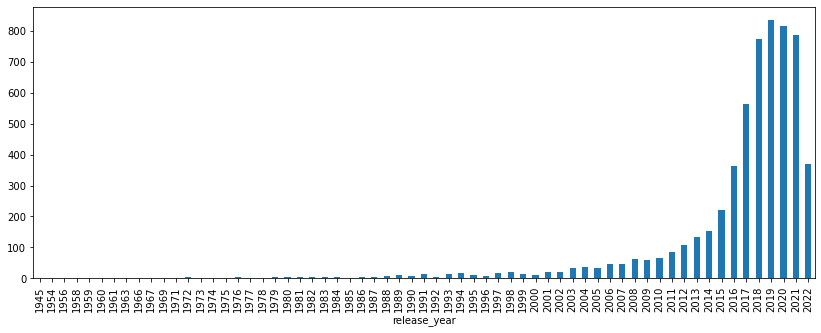

In [90]:
df_conteo_por_año = df2.groupby(by = 'release_year')["title"].count()
df_conteo_por_año.plot(kind='bar', figsize = (14,5))

## Análisis y Visualizaciones

*Ingrese su análisis aquí*


In [171]:
df5

main_genre,release_year,,action,animation,comedy,crime,documentation,drama,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,1945,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1954,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,1956,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1958,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018,10.0,38.0,45.0,188.0,28.0,89.0,179.0,13.0,14.0,1.0,14.0,9.0,23.0,21.0,36.0,NaN,60.0,3.0,2.0
59,2019,7.0,40.0,32.0,173.0,42.0,116.0,217.0,17.0,9.0,5.0,14.0,10.0,27.0,37.0,35.0,2.0,49.0,3.0,1.0
60,2020,8.0,37.0,52.0,159.0,36.0,123.0,185.0,15.0,16.0,3.0,17.0,15.0,33.0,27.0,28.0,NaN,54.0,5.0,1.0
61,2021,17.0,42.0,48.0,130.0,44.0,112.0,179.0,15.0,16.0,4.0,15.0,5.0,36.0,37.0,28.0,2.0,51.0,5.0,1.0


<AxesSubplot:xlabel='release_year'>

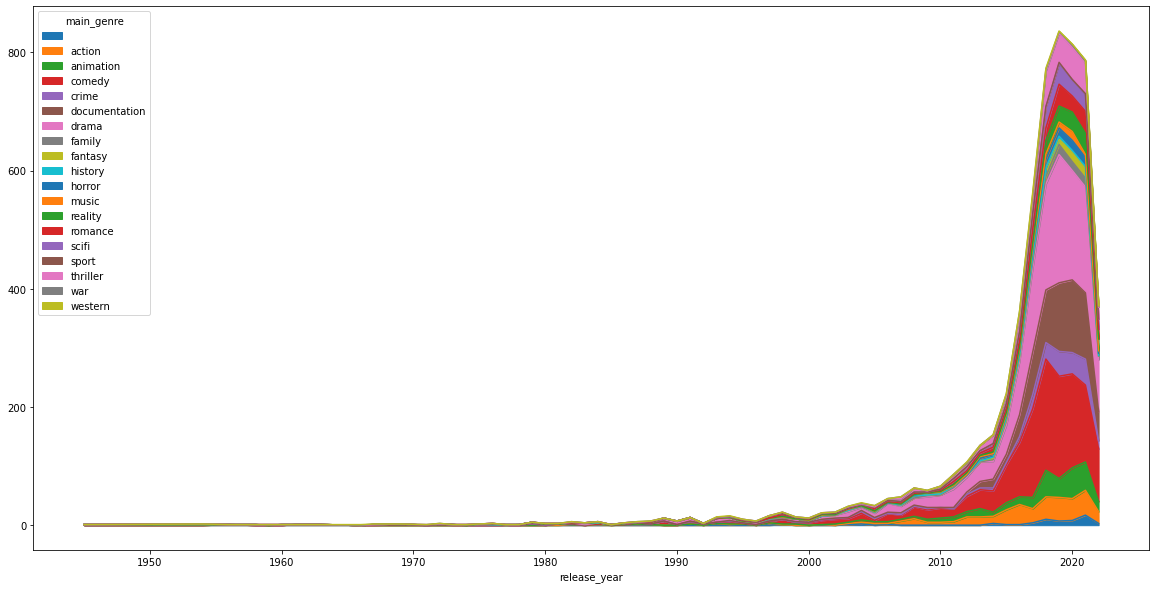

In [176]:
# Ingrese su código de visualización aquí
import numpy as np
df5 = df.pivot_table(columns = "main_genre", index = ["release_year"], values = "title"
                     , aggfunc = np.count_nonzero)
df5.plot(kind='area',stacked=True, figsize=(20, 10)) # stacked = False hasta 3 variables, mas
#df5 


In [46]:
import plotly.express as px
px.scatter(df5, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [ ]:
# Ingrese su código de visualización aquí

In [ ]:
# Ingrese su código de visualización aquí

## Conclusión

*Ingrese conclusión aquí*

In [ ]:
# Ingrese código aquí

## Almacenamiento de resultados

In [ ]:
# Ingrese código aquí